<a href="https://colab.research.google.com/github/audreyemmely/computer-vision/blob/main/visaocomp_lista1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Resolução Lista 1**


---

ARQUIMEDES VINÍCIUS PEREIRA DE FRANÇA MOURA (impares)

AUDREY EMMELY RODRIGUES VASCONCELOS (pares)



## Instalação do opencv

In [1]:
#!pip install opencv-python

## Importando bibliotecas

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

## Importando assets

In [3]:
# image path 
path1 = 'https://user-images.githubusercontent.com/52829664/163676629-e6ba9f73-3115-4b8a-94de-42ad57632f9b.jpg'
path2 = 'https://user-images.githubusercontent.com/52829664/163676630-8ffbc9a0-de16-44d1-8120-4801a9ab5f7b.jpg'
path3 = 'https://user-images.githubusercontent.com/52829664/163676631-a0b3e8b6-2f84-4e5f-bd7f-759b635cda63.jpg'
path4 = 'https://user-images.githubusercontent.com/52829664/163676627-e9d549ee-a15c-4703-a8ed-b5c780d5975c.jpeg'


## Questão 1

Implemente uma função que receba o tamanho n de um filtro espacial com dimensões n × n, e a matriz com os pesos do filtro, e aplique o
filtro numa imagem, gerando e salvando a imagem resultante no disco.

In [4]:
def spatialFilter(image, kernel, n=0):

    # Gather Shapes of Kernel + Image
    # We dont need to know the size of the img or kernel if we can get the shape
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape)) + 1)
    yOutput = int(((yImgShape - yKernShape)) + 1)
    output = np.zeros((xOutput, yOutput))

    # Iterate through image
    for y in range(image.shape[1]):
        if y > image.shape[1] - yKernShape:
            break
        for x in range(image.shape[0]):
            if x > image.shape[0] - xKernShape:
                break
            output[x, y] = (kernel * image[x: x + xKernShape, y: y + yKernShape]).sum()
            
    return output

img = io.imread(path1)

kernel = np.array([
          [0, 0,   0],
          [0, 0.5, 0],
          [0, 1, 0.5]])

dst = spatialFilter(img,kernel)

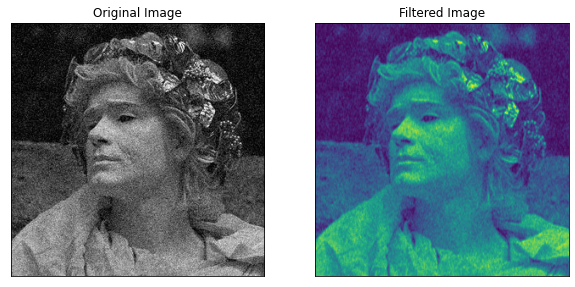

In [5]:
figure, axarr = plt.subplots(nrows=1,ncols=2,figsize=(10, 10))
axarr[0].imshow(img)
axarr[1].imshow(dst)
plt.sca(axarr[0]); plt.imshow(img); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr[1]); plt.imshow(dst); plt.title('Filtered Image'); plt.xticks([]); plt.yticks([])
plt.show()

## Questão 2

Implemente dois tipos de filtro para remoção de ruídos e aplique-os
em três imagens distintas.

Filtro 1 - Bilateral Filter

A biblioteca OpenCV fornece a função cv2.bilateralFilter() para desfocar a imagem com um filtro bilateral. Esta função pode ser aplicada para reduzir o ruído, mantendo as bordas nítidas.

Filtro 2 - Gaussian Filter

A filtragem Gaussiana fornece o método cv2.GaussianBlur() para desfocar uma imagem usando o Kernel Gaussiano. Cada pixel de uma imagem é multiplicado pelo Kernel Gaussiano. Isto significa que um Kernel gaussiano é uma matriz quadrada de pixels.

In [6]:
img1 = io.imread(path1)
img2 = io.imread(path2)
img3 = io.imread(path3)

#Using Gaussian Filter
dst1 = cv2.GaussianBlur(img1,(5,5),cv2.BORDER_DEFAULT) 

dst2 = cv2.GaussianBlur(img2,(5,5),cv2.BORDER_DEFAULT) 

dst3 = cv2.GaussianBlur(img3,(5,5),cv2.BORDER_DEFAULT) 

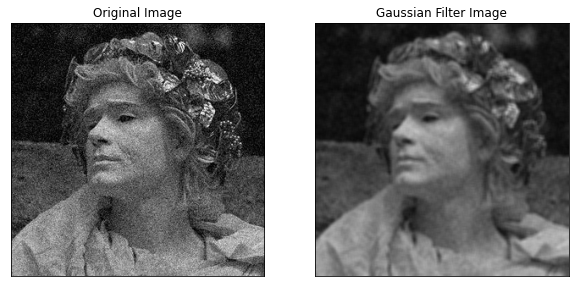

In [7]:
figure, axarr = plt.subplots(nrows=1,ncols=2,figsize=(10, 10))
axarr[0].imshow(img)
axarr[1].imshow(dst)
plt.sca(axarr[0]); plt.imshow(img1); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr[1]); plt.imshow(dst1); plt.title('Gaussian Filter Image'); plt.xticks([]); plt.yticks([])
plt.show()

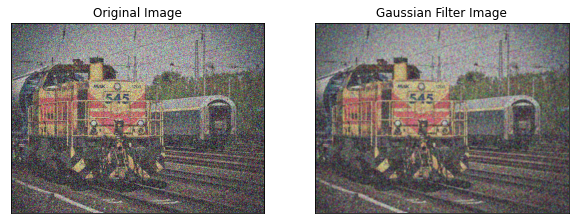

In [8]:
figure, axarr = plt.subplots(nrows=1,ncols=2,figsize=(10, 10))
axarr[0].imshow(img)
axarr[1].imshow(dst)
plt.sca(axarr[0]); plt.imshow(img2); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr[1]); plt.imshow(dst2); plt.title('Gaussian Filter Image'); plt.xticks([]); plt.yticks([])
plt.show()

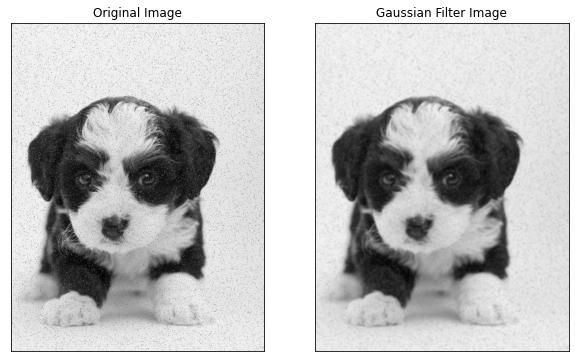

In [9]:
figure, axarr = plt.subplots(nrows=1,ncols=2,figsize=(10, 10))
axarr[0].imshow(img)
axarr[1].imshow(dst)
plt.sca(axarr[0]); plt.imshow(img3); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr[1]); plt.imshow(dst3); plt.title('Gaussian Filter Image'); plt.xticks([]); plt.yticks([])
plt.show()

In [10]:
#Using Bilateral FIlter
dst4 = cv2.bilateralFilter(img1, 5, 10, 10)

dst5 = cv2.bilateralFilter(img2, 5, 10, 10)

dst6 = cv2.bilateralFilter(img3, 5, 10, 10)

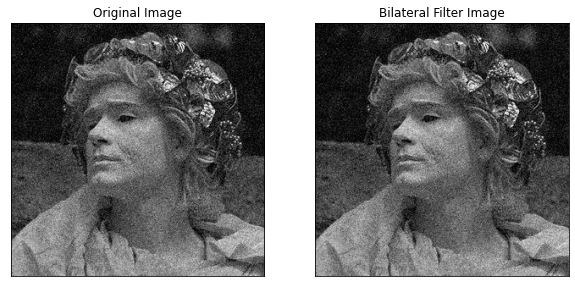

In [11]:
figure, axarr = plt.subplots(nrows=1,ncols=2,figsize=(10, 10))
axarr[0].imshow(img)
axarr[1].imshow(dst)
plt.sca(axarr[0]); plt.imshow(img1); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr[1]); plt.imshow(dst4); plt.title('Bilateral Filter Image'); plt.xticks([]); plt.yticks([])
plt.show()

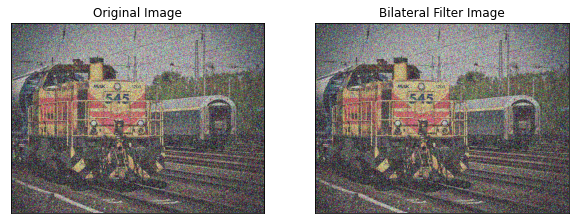

In [12]:
figure, axarr = plt.subplots(nrows=1,ncols=2,figsize=(10, 10))
axarr[0].imshow(img2)
axarr[1].imshow(dst5)
plt.sca(axarr[0]); plt.imshow(img2); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr[1]); plt.imshow(dst5); plt.title('Bilateral Filter Image'); plt.xticks([]); plt.yticks([])
plt.show()

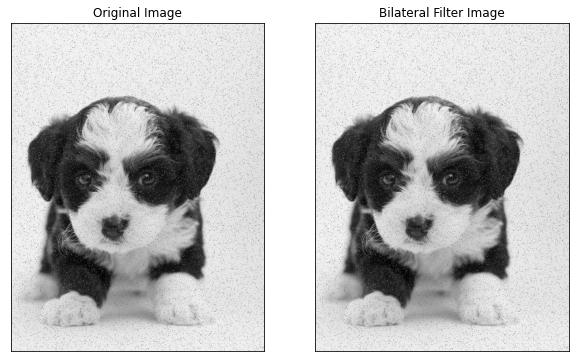

In [13]:
figure, axarr = plt.subplots(nrows=1,ncols=2,figsize=(10, 10))
axarr[0].imshow(img3)
axarr[1].imshow(dst6)
plt.sca(axarr[0]); plt.imshow(img3); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr[1]); plt.imshow(dst6); plt.title('Bilateral Filter Image'); plt.xticks([]); plt.yticks([])
plt.show()

## Questão 3

Pesquise um filtro passa-alta e aplique-o em 3 imagens distintas,
variando o valor de n em 3 unidades em cada imagem. O que acontece
quando n cresce?

In [14]:
def highpass(image, sigma, size=(0,0)):
    return image - cv2.GaussianBlur(image, size, sigma) + 127

dst1 = highpass(img3, 10)
dst2 = highpass(img3, 13)
dst3 = highpass(img3, 16)

img4 = io.imread(path4)
dst4 = highpass(img4, 1)
dst5 = highpass(img4, 4)
dst6 = highpass(img4, 7)

dst7 = highpass(img1, 10)
dst8 = highpass(img1, 13)
dst9 = highpass(img1, 16)


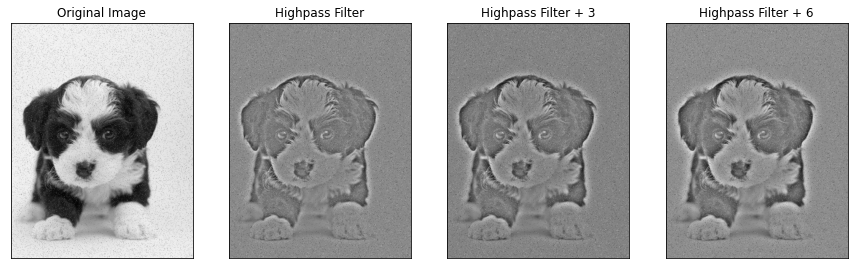

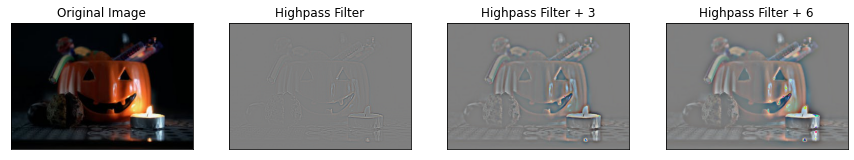

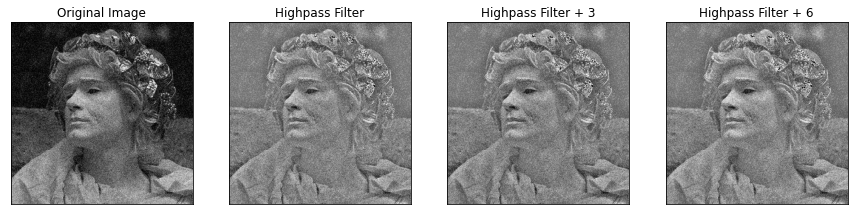

In [15]:
figure, axarr = plt.subplots(nrows=1,ncols=4,figsize=(15, 15))
axarr[0].imshow(img3)
axarr[1].imshow(dst1)
axarr[2].imshow(dst2)
axarr[3].imshow(dst3)
plt.sca(axarr[0]); plt.imshow(img3); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr[1]); plt.imshow(dst1); plt.title('Highpass Filter'); plt.xticks([]); plt.yticks([])
plt.sca(axarr[2]); plt.imshow(dst2); plt.title('Highpass Filter + 3'); plt.xticks([]); plt.yticks([])
plt.sca(axarr[3]); plt.imshow(dst3); plt.title('Highpass Filter + 6'); plt.xticks([]); plt.yticks([])

figure2, axarr2 = plt.subplots(nrows=1,ncols=4,figsize=(15, 15))
axarr2[0].imshow(img4)
axarr2[1].imshow(dst4)
axarr2[2].imshow(dst5)
axarr2[3].imshow(dst6)
plt.sca(axarr2[0]); plt.imshow(img4); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr2[1]); plt.imshow(dst4); plt.title('Highpass Filter'); plt.xticks([]); plt.yticks([])
plt.sca(axarr2[2]); plt.imshow(dst5); plt.title('Highpass Filter + 3'); plt.xticks([]); plt.yticks([])
plt.sca(axarr2[3]); plt.imshow(dst6); plt.title('Highpass Filter + 6'); plt.xticks([]); plt.yticks([])

figure3, axarr3 = plt.subplots(nrows=1,ncols=4,figsize=(15, 15))
axarr3[0].imshow(img1)
axarr3[1].imshow(dst7)
axarr3[2].imshow(dst8)
axarr3[3].imshow(dst9)
plt.sca(axarr3[0]); plt.imshow(img1); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr3[1]); plt.imshow(dst7); plt.title('Highpass Filter'); plt.xticks([]); plt.yticks([])
plt.sca(axarr3[2]); plt.imshow(dst8); plt.title('Highpass Filter + 3'); plt.xticks([]); plt.yticks([])
plt.sca(axarr3[3]); plt.imshow(dst9); plt.title('Highpass Filter + 6'); plt.xticks([]); plt.yticks([])

plt.show()

## Questão 4

Pesquise um filtro passa-baixa e aplique-o em 3 imagens distintas, variando o valor de n em 3 unidades em cada imagem. O que acontece
quando n cresce?

In [16]:
#Using Averaging Filter
im1 = cv2.blur(img1,(5,5))
im2 = cv2.boxFilter(img1, -1, (10, 10), normalize=True)  

im3 = cv2.blur(img2,(5,5))
im4 = cv2.boxFilter(img2, -1, (13, 13), normalize=True)  

im5 = cv2.blur(img3,(5,5))
im6 = cv2.boxFilter(img3, -1, (16, 16), normalize=True)

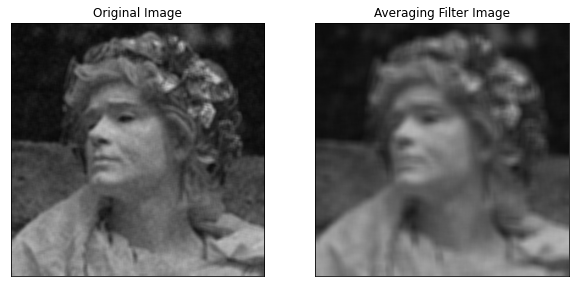

In [17]:
figure, axarr = plt.subplots(nrows=1,ncols=2,figsize=(10, 10))
axarr[0].imshow(im1)
axarr[1].imshow(im2)
plt.sca(axarr[0]); plt.imshow(im1); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr[1]); plt.imshow(im2); plt.title('Averaging Filter Image'); plt.xticks([]); plt.yticks([])
plt.show()

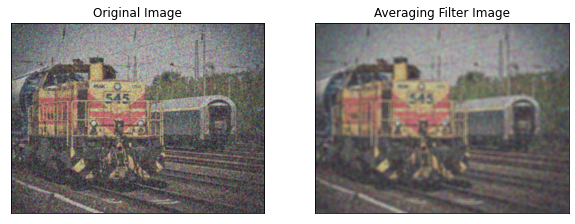

In [18]:
figure, axarr = plt.subplots(nrows=1,ncols=2,figsize=(10, 10))
axarr[0].imshow(im3)
axarr[1].imshow(im4)
plt.sca(axarr[0]); plt.imshow(im3); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr[1]); plt.imshow(im4); plt.title('Averaging Filter Image'); plt.xticks([]); plt.yticks([])
plt.show()

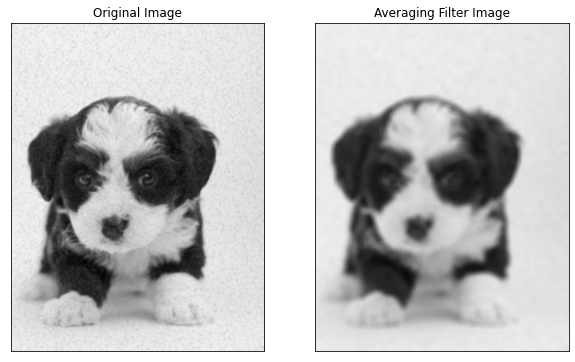

In [19]:
figure, axarr = plt.subplots(nrows=1,ncols=2,figsize=(10, 10))
axarr[0].imshow(im5)
axarr[1].imshow(im6)
plt.sca(axarr[0]); plt.imshow(im5); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr[1]); plt.imshow(im6); plt.title('Averaging Filter Image'); plt.xticks([]); plt.yticks([])
plt.show()

## Questão 5

Aplique o detector de canny usando a função Canny() do OpenCV
em uma ou mais imagens de sua escolha. Experimente variar os parâmetros
threshold1, threshold2 e apertureSize. Explique com suas palavras a influência de cada parâmetro no resultado.

In [20]:
img4 = io.imread(path4)
threshold1 = 100  # Lower Threshold
threshold2 = 200  # Upper threshold
aperture_size = 5  # Aperture size
  
edge_without_apsize = cv2.Canny(img4, threshold1, threshold2)
edge_with_apsize = cv2.Canny(img4, threshold1, threshold2, apertureSize=aperture_size)

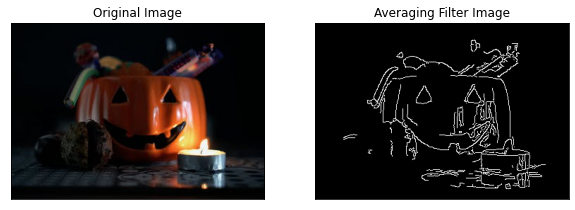

In [21]:
figure, axarr = plt.subplots(nrows=1,ncols=2,figsize=(10, 10))
axarr[0].imshow(img4)
axarr[1].imshow(edge_without_apsize)
plt.sca(axarr[0]); plt.imshow(img4); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr[1]); plt.imshow(edge_without_apsize, cmap = 'gray'); plt.title('Averaging Filter Image'); plt.xticks([]); plt.yticks([])
plt.show()

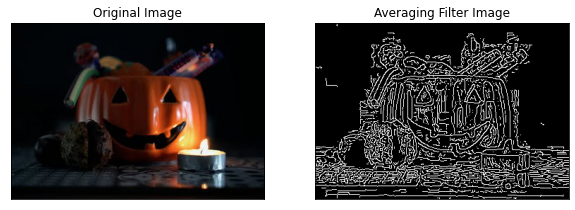

In [22]:
figure, axarr = plt.subplots(nrows=1,ncols=2,figsize=(10, 10))
axarr[0].imshow(img4)
axarr[1].imshow(edge_without_apsize)
plt.sca(axarr[0]); plt.imshow(img4); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr[1]); plt.imshow(edge_with_apsize, cmap = 'gray'); plt.title('Averaging Filter Image'); plt.xticks([]); plt.yticks([])
plt.show()

## Questão 6

Um filtro passa-baixa bastante conhecido é o filtro Gaussiano.
Através de uma máscara determinada por um desvio padrão σ, é possível
fazer o que chamamos de suavização gaussiana de uma imagem. Considere
o filtro 5x5 de desvio padrão unitário abaixo:

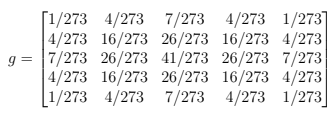

Crie uma imagem I de dimensões 100 × 100 que contém um único valor não nulo localizado no centro da imagem. Utilizando o filtro gaussiano
acima, calcule e exiba I ∗ g, onde ∗ é a notação para o operador de convolução.

## Questão 8

Implemente uma função que reduza um ou aumente a resolução da imagem por fatores (sx, sy). Você só pode usar o OpenCV para carregar a imagem. Se s < 1, implemente o algoritmo do slide 4. Se s > 1, use interpolação por vizinho mais próximo (slide 23). Aplique em três imagens distintas.

## Questão 9

Escolha uma imagem interessante e gere uma pirâmide aplicando sucessivamente downsampling 3 vezes com fator 1/2. Faça o mesmo com
uma pirâmide gaussiana e compare os resultados. Mostre os resultados de
cada pirâmide em uma única imagem lado a lado, como nos slides da aula
(vai exigir algumas operações de translação de imagens). Obs.: aqui você
pode usar funções do OpenCV.

## Questão 10

Usando as funções que você implementou, crie funções que apliquem filtros para calcular as imagens representando ∂f/∂x ,∂f/∂y e |∇f|. Implemente também as mesmas usando o operador de Sobel. Aplique-as diretamente em algumas imagens de sua escolha, e compare o efeito do ruído.

## Referências

[Python OpenCV Image Filtering](https://www.etutorialspoint.com/index.php/308-python-opencv-image-filtering)

[OpenCV: Smoothing Images](https://docs.opencv.org/4.x/dd/d6a/tutorial_js_filtering.html)

[Python OpenCV – Canny() Function](https://www.geeksforgeeks.org/python-opencv-canny-function/)